<a href="https://colab.research.google.com/github/Tech-savvyPavithra/Data_Science/blob/main/Soil_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My Workouts/Crop_recommendation.csv')
print(data)

        N   P   K  temperature   humidity        ph    rainfall    crop
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [ ]:
data.shape

(2200, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2198 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           2
dtype: int64

In [ ]:
data['crop'].fillna(data['crop'].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

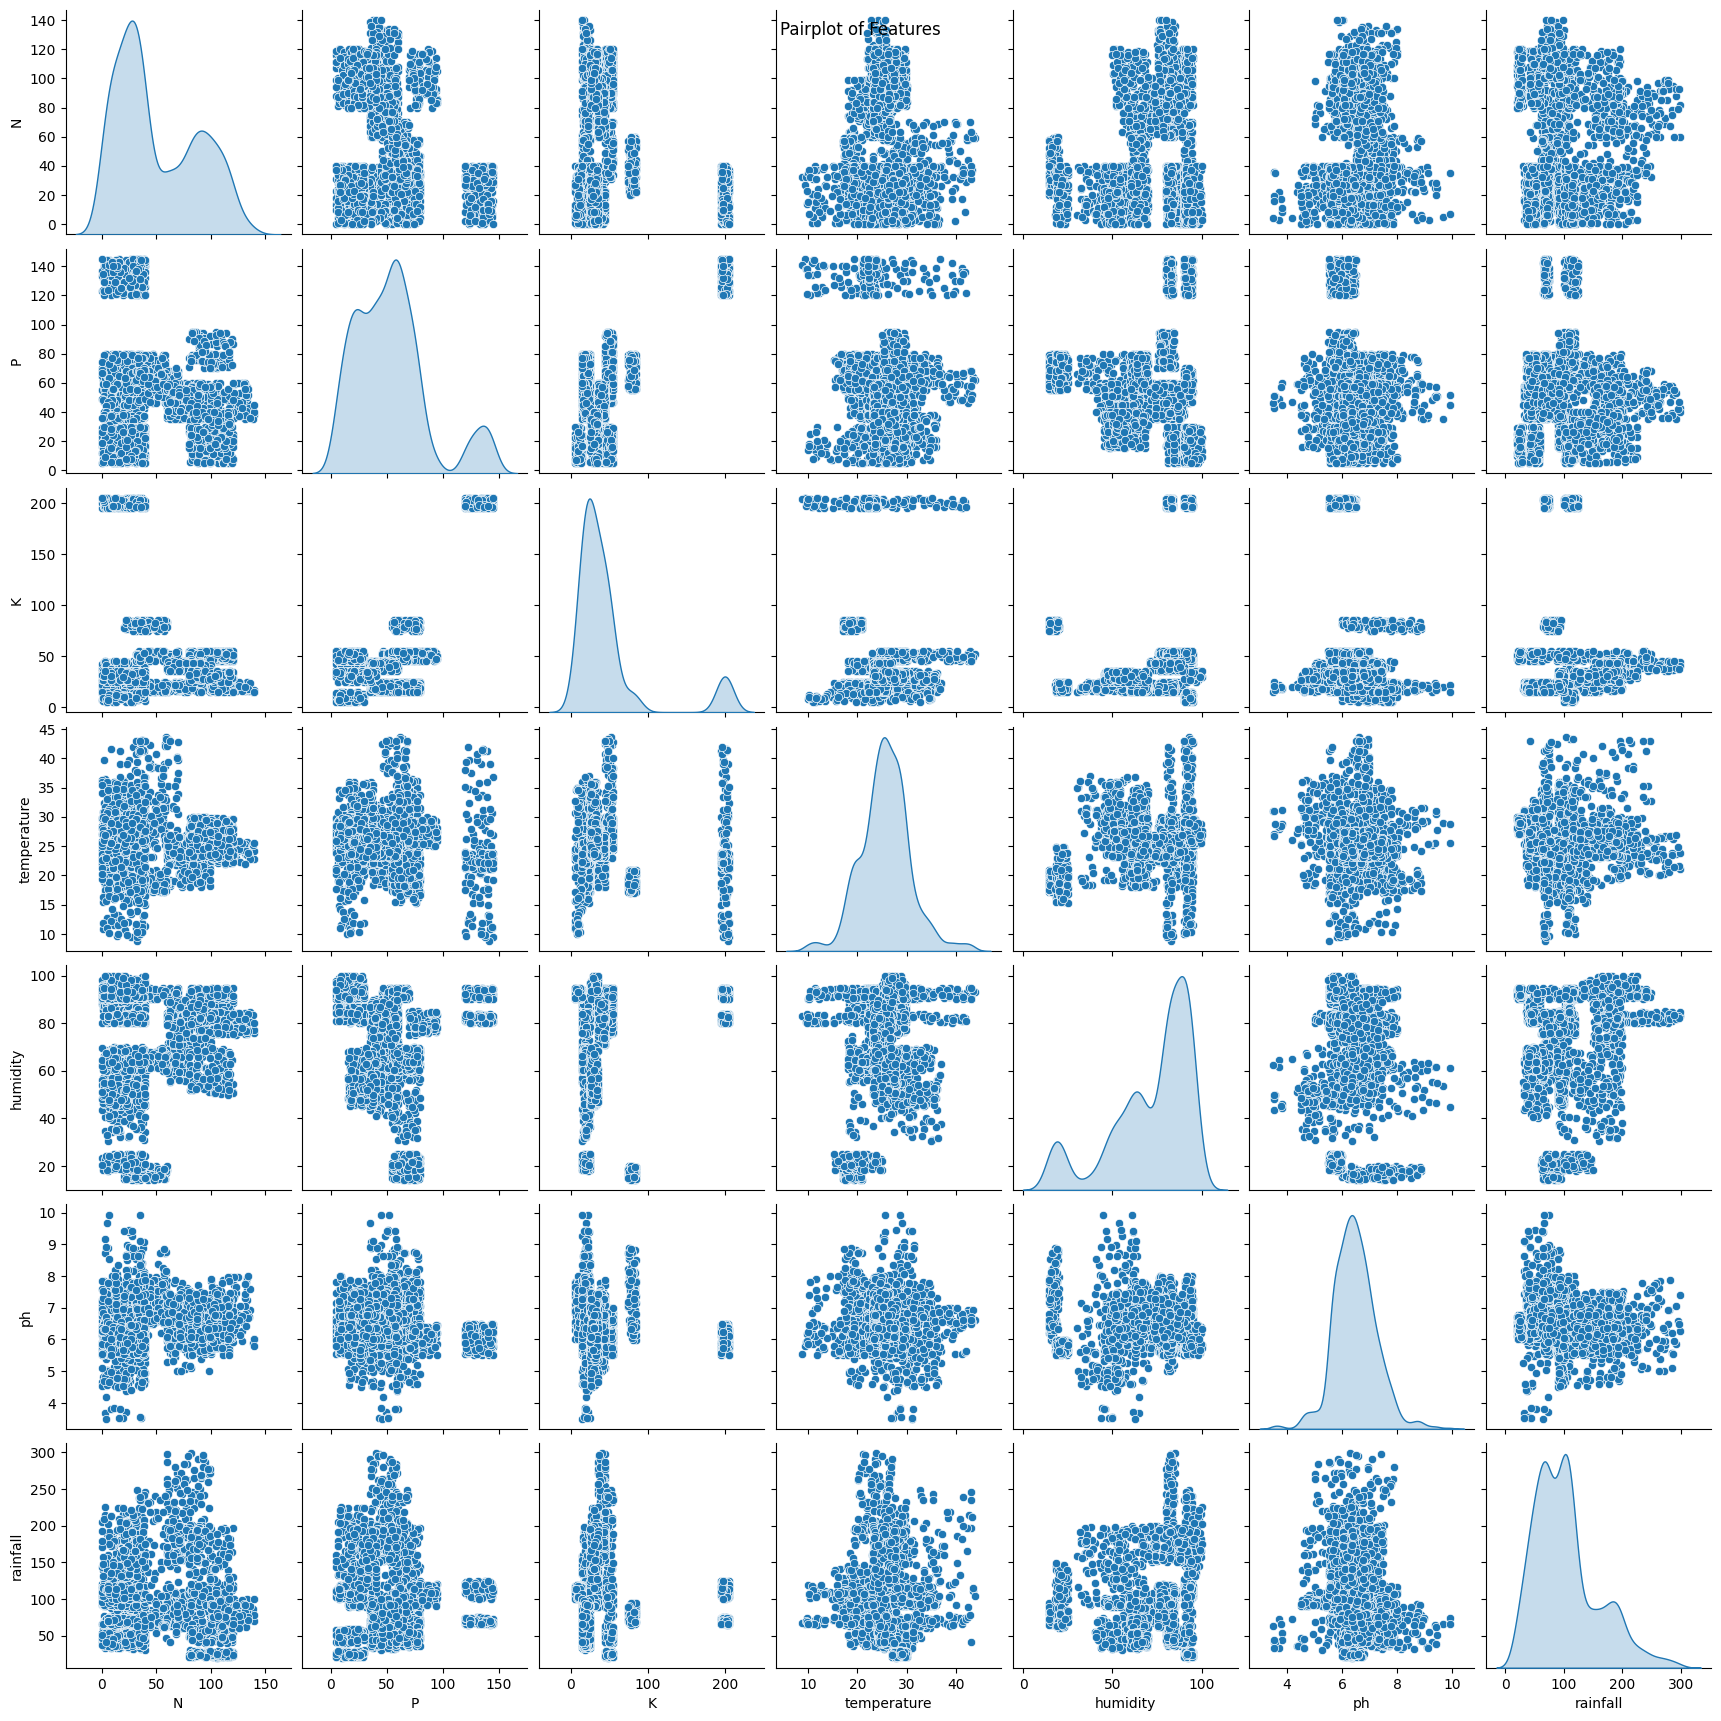

In [ ]:
# Pairplot to visualize the relationship between features
sns.pairplot(data, vars=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], diag_kind='kde')
plt.suptitle("Pairplot of Features")
plt.show()

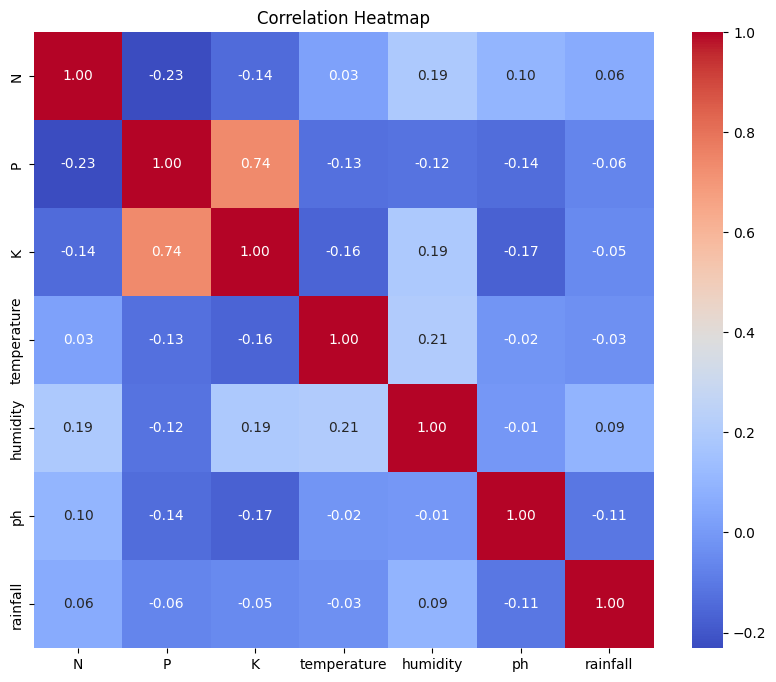

In [ ]:
# Correlation heatmap to visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

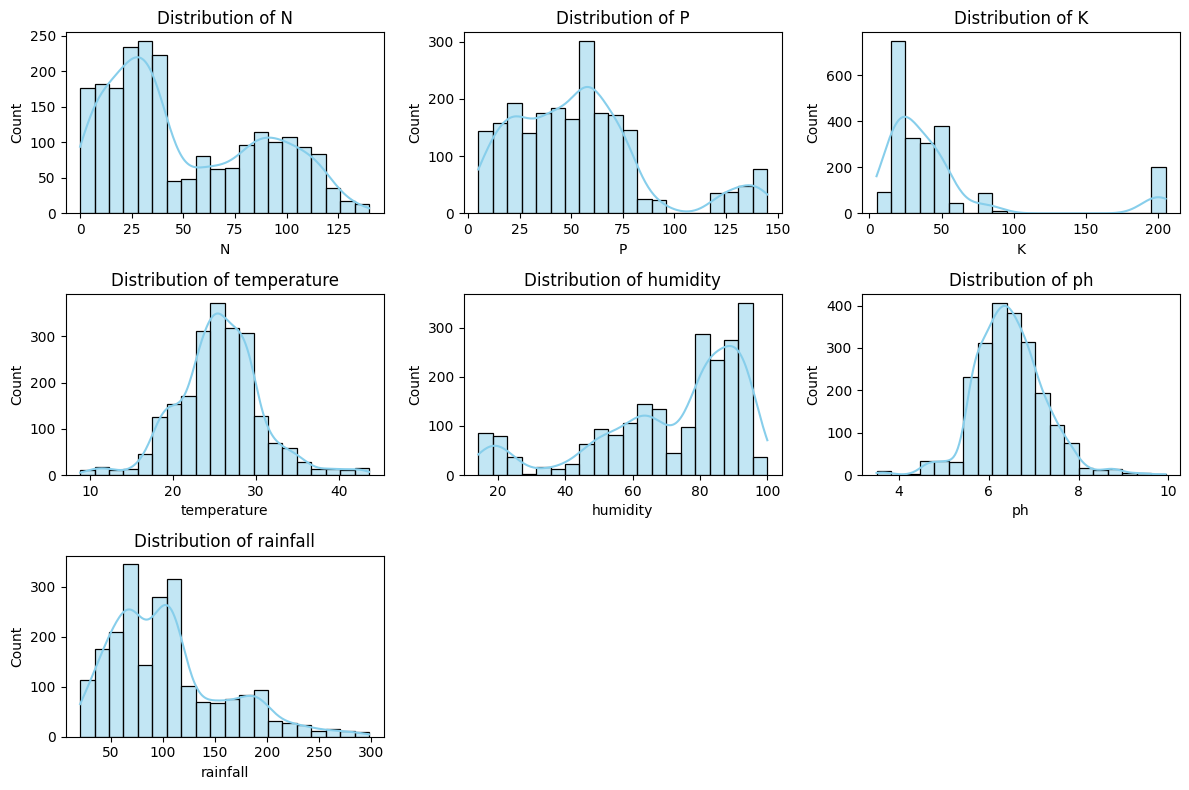

In [ ]:
# Histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

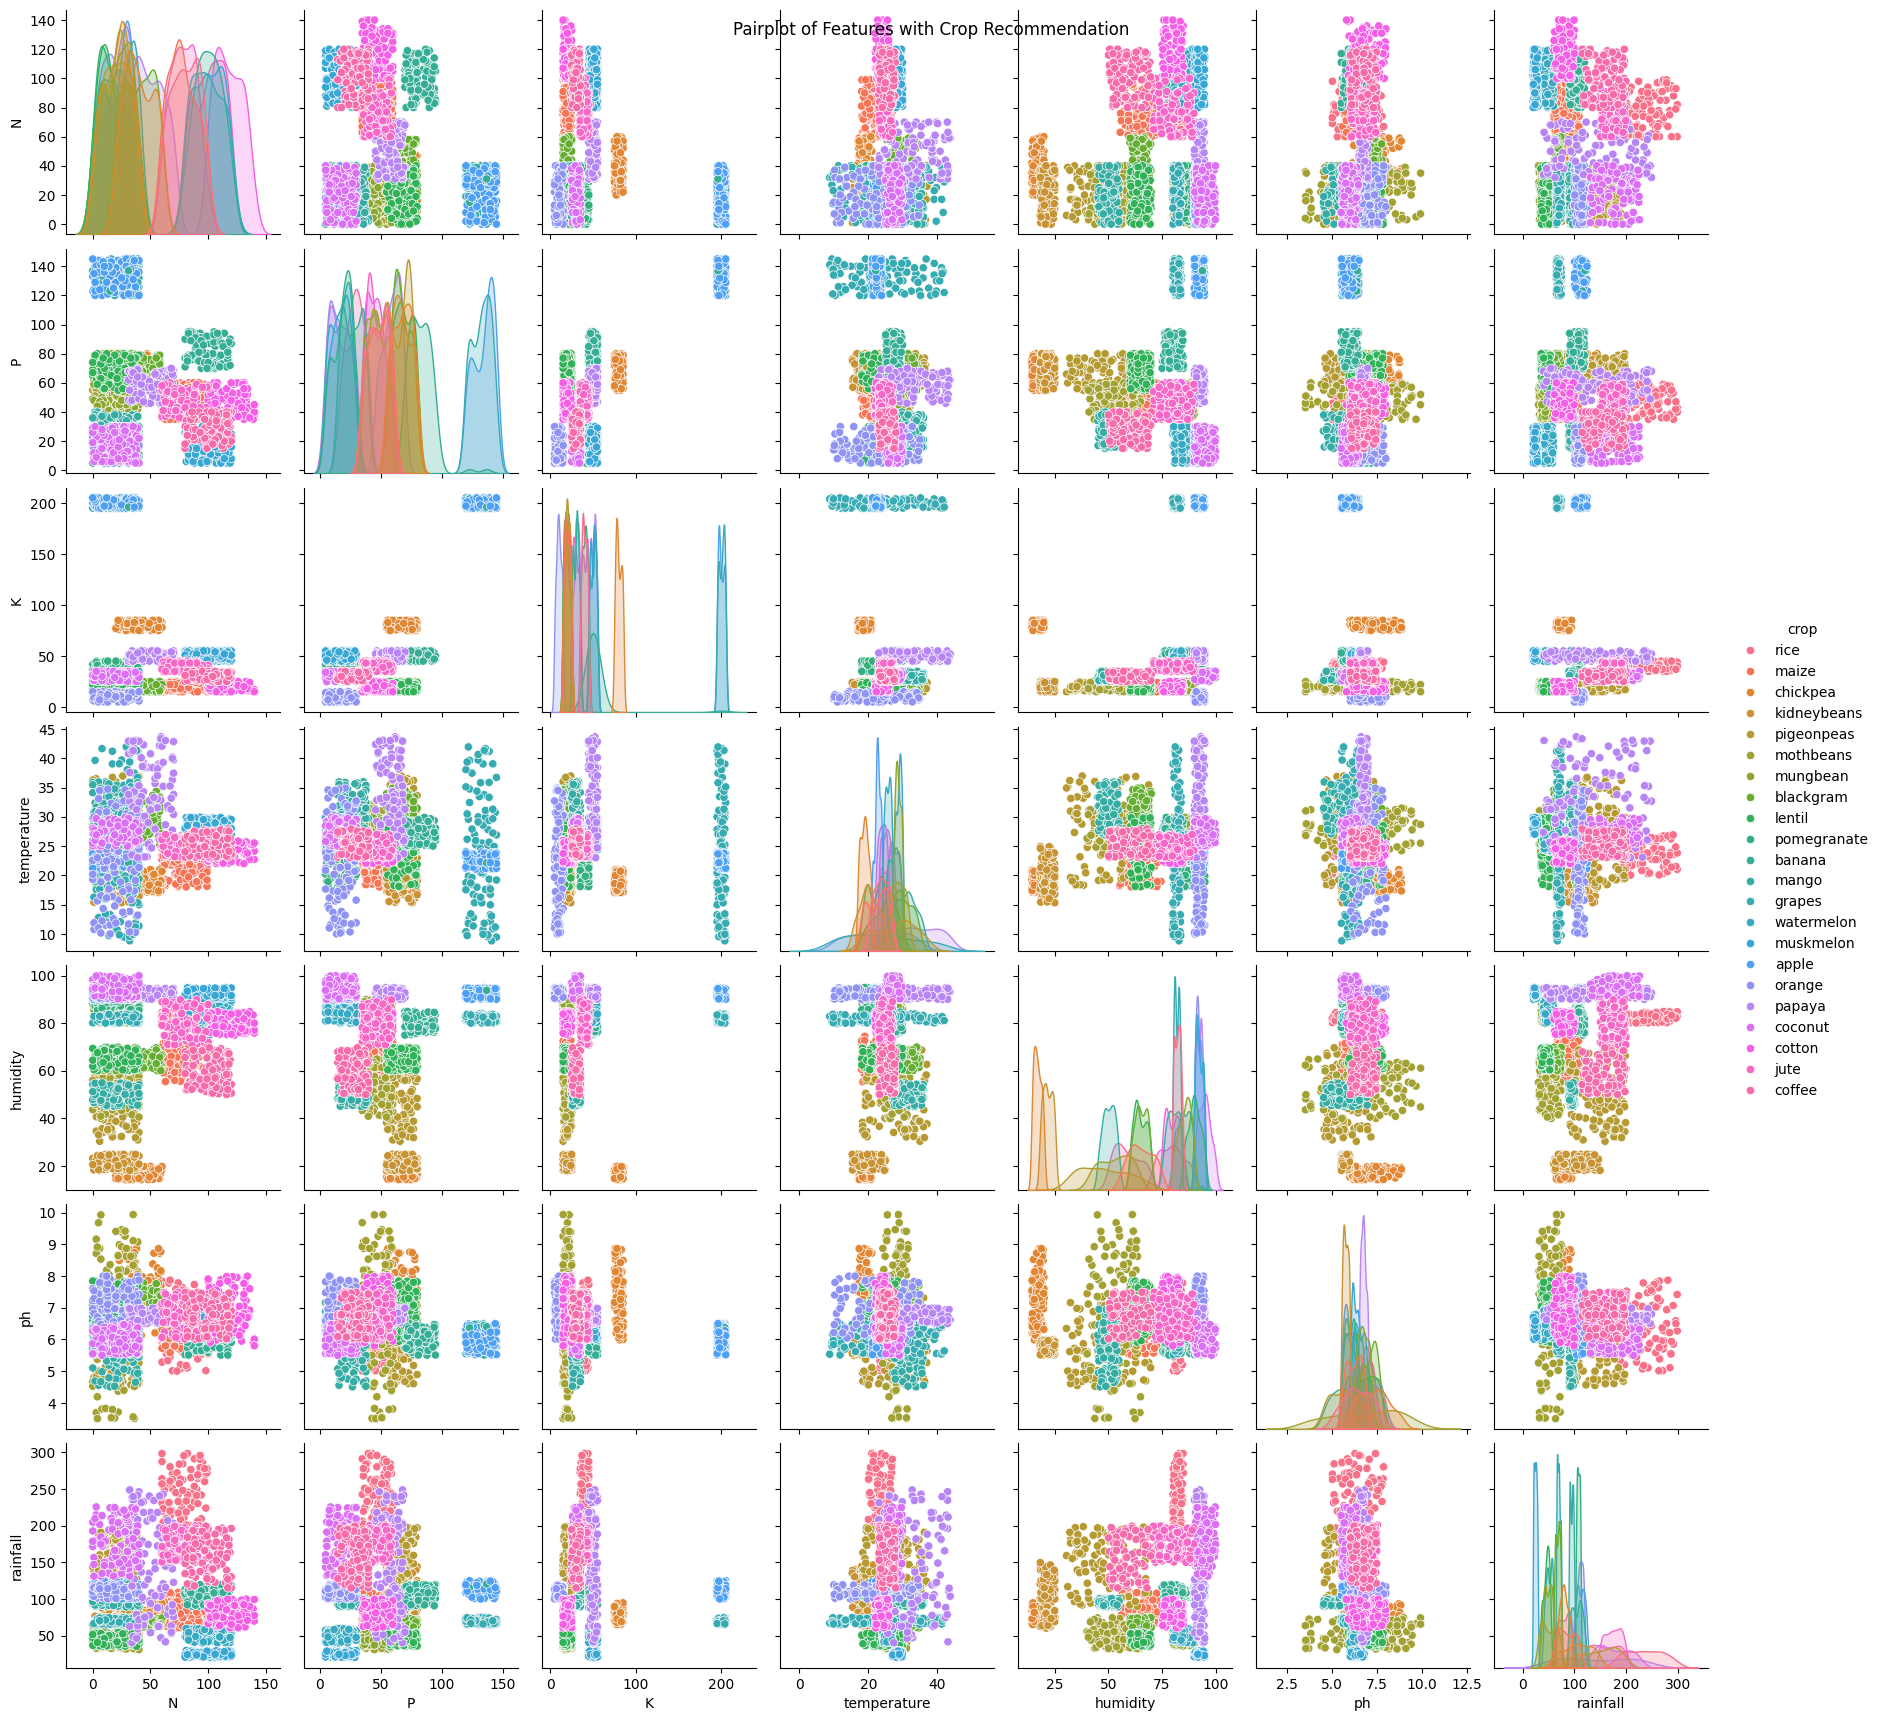

In [ ]:
# Pairwise scatterplots with hue based on crop recommendation
sns.pairplot(data, vars=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], hue='crop', diag_kind='kde')
plt.suptitle("Pairplot of Features with Crop Recommendation")
plt.show()

<ipython-input-14-61f569bc0468>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['crop'], palette='pastel')


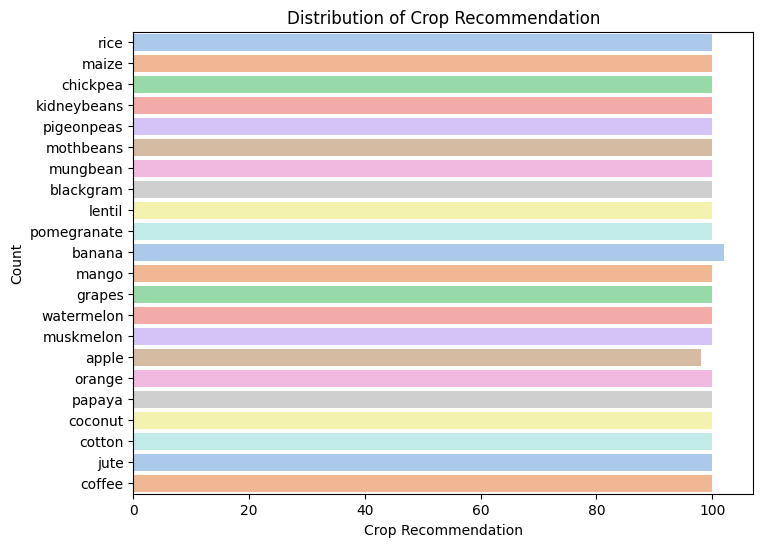

In [ ]:
# Count plot of target variable
plt.figure(figsize=(8, 6))
sns.countplot(data['crop'], palette='pastel')
plt.title('Distribution of Crop Recommendation')
plt.xlabel('Crop Recommendation')
plt.ylabel('Count')
plt.show()

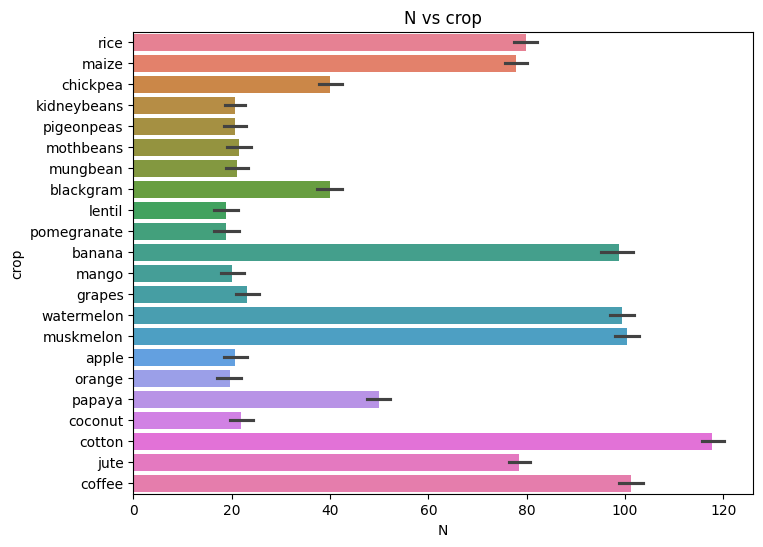

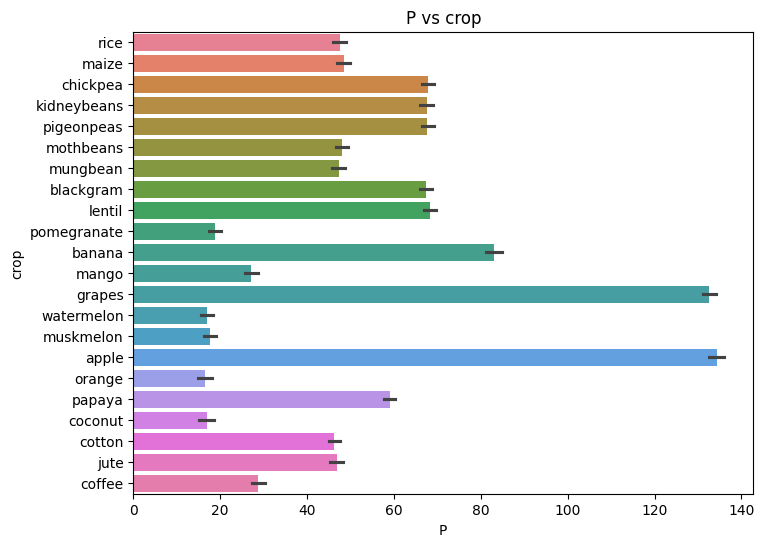

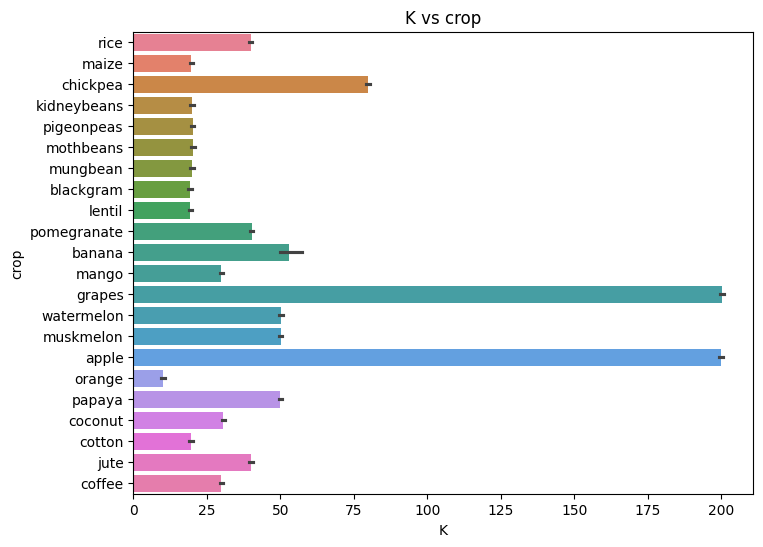

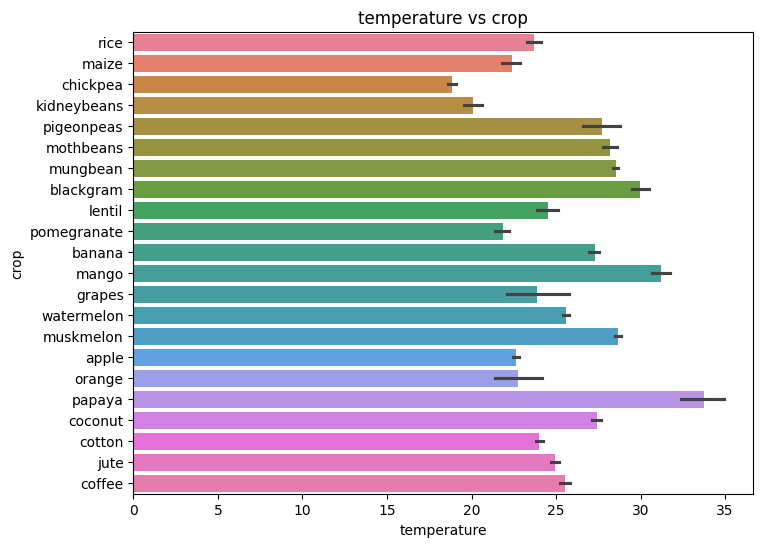

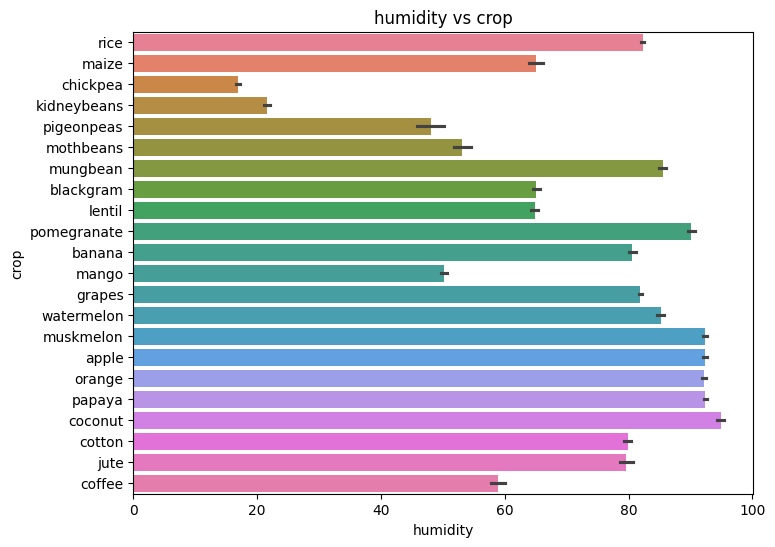

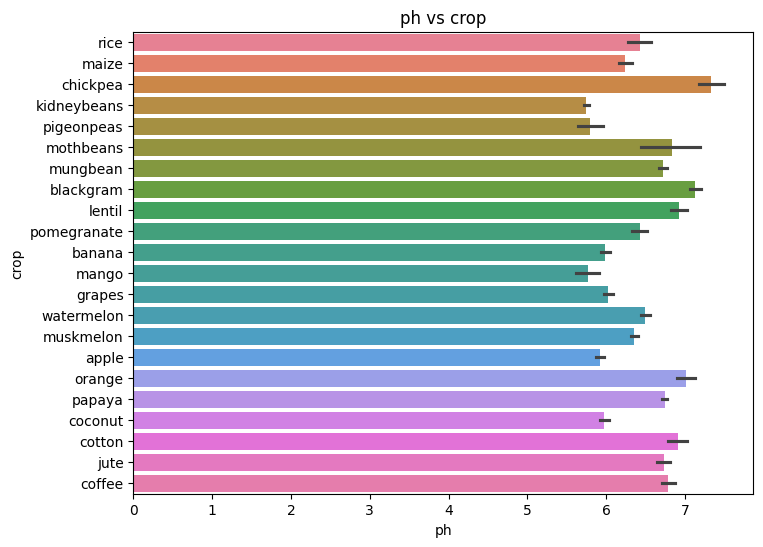

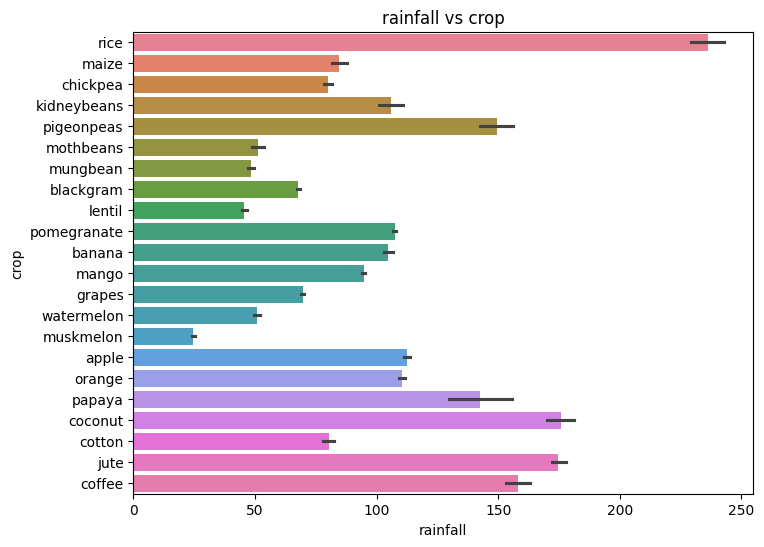

In [ ]:
# Define attributes and target variable
attributes = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
target = 'crop'
# Create separate plots for each attribute vs target
for attribute in attributes:
    plt.figure(figsize=(8, 6))
    sns.barplot(y=target, x=attribute, data=data, hue=target)
    plt.title(f'{attribute} vs {target}')
    plt.xlabel(attribute)
    plt.ylabel(target)
    plt.show()

In [ ]:
# Split features and target variable
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['crop']

In [ ]:
print(X)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


In [ ]:
print(y)

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: crop, Length: 2200, dtype: object


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)

        N    P    K  temperature   humidity        ph    rainfall
1656   17   16   14    16.396243  92.181519  6.625539  102.944161
752    37   79   19    27.543848  69.347863  7.143943   69.408782
892     7   73   25    27.521856  63.132153  7.288057   45.208411
1041  101   70   48    25.360592  75.031933  6.012697  116.553145
1179    0   17   30    35.474783  47.972305  6.279134   97.790725
...   ...  ...  ...          ...        ...       ...         ...
1638   10    5    5    21.213070  91.353492  7.817846  112.983436
1095  108   94   47    27.359116  84.546250  6.387431   90.812505
1130   11   36   31    27.920633  51.779659  6.475449  100.258567
1294   11  124  204    13.429886  80.066340  6.361141   71.400430
860    32   78   22    23.970814  62.355576  7.007038   53.409060

[1760 rows x 7 columns]


In [ ]:
print(X_test)

        N    P    K  temperature   humidity        ph    rainfall
1451  101   17   47    29.494014  94.729813  6.185053   26.308209
1334   98    8   51    26.179346  86.522581  6.259336   49.430510
1761   59   62   49    43.360515  93.351916  6.941497  114.778071
1735   44   60   55    34.280461  90.555616  6.825371   98.540477
1576   30  137  200    22.914300  90.704756  5.603413  118.604465
...   ...  ...  ...          ...        ...       ...         ...
59     99   55   35    21.723831  80.238990  6.501698  277.962619
71     67   45   38    22.727910  82.170688  7.300411  260.887506
1908  121   47   16    23.605640  79.295731  7.723240   72.498009
1958  116   52   19    22.942767  75.371706  6.114526   67.080226
482     5   68   20    19.043805  33.106951  6.121667  155.370562

[440 rows x 7 columns]


In [ ]:
print(y_train)

1656       orange
752     blackgram
892        lentil
1041       banana
1179        mango
          ...    
1638       orange
1095       banana
1130        mango
1294       grapes
860        lentil
Name: crop, Length: 1760, dtype: object


In [ ]:
print(y_test)

1451     muskmelon
1334    watermelon
1761        papaya
1735        papaya
1576         apple
           ...    
59            rice
71            rice
1908        cotton
1958        cotton
482     pigeonpeas
Name: crop, Length: 440, dtype: object


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled)

[[-9.03426596e-01 -1.12616170e+00 -6.68506601e-01 ...  9.36586183e-01
   1.93473784e-01  5.14970176e-03]
 [-3.67051340e-01  7.70358846e-01 -5.70589522e-01 ... -1.00470485e-01
   8.63917548e-01 -6.05290566e-01]
 [-1.17161422e+00  5.89737842e-01 -4.53089028e-01 ... -3.82774991e-01
   1.05029771e+00 -1.04580687e+00]
 ...
 [-1.06433917e+00 -5.24091685e-01 -3.35588533e-01 ... -8.98381379e-01
  -6.34357580e-04 -4.37358211e-02]
 [-1.06433917e+00  2.12501638e+00  3.05234239e+00 ...  3.86340190e-01
  -1.48467347e-01 -5.69036842e-01]
 [-5.01145154e-01  7.40255346e-01 -5.11839275e-01 ... -4.18045489e-01
   6.86860180e-01 -8.96531475e-01]]


In [ ]:
print(X_test_scaled)

[[ 1.34934948 -1.0960582  -0.02225388 ...  1.05232434 -0.37619899
  -1.38984486]
 [ 1.26889319 -1.36698971  0.05607978 ...  0.67956909 -0.28013033
  -0.96895253]
 [ 0.22296144  0.25859933  0.01691295 ...  0.98974316  0.60209743
   0.22056087]
 ...
 [ 1.88572474 -0.19295318 -0.62933977 ...  0.35134079  1.61311363
  -0.54905776]
 [ 1.75163092 -0.04243567 -0.57058952 ...  0.1731198  -0.46741089
  -0.64767698]
 [-1.22525175  0.43922034 -0.55100611 ... -1.74645651 -0.45817577
   0.95946086]]


In [ ]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
print(y_pred)

['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil' 'blackgram' 'coconut' 'pomegranate'
 'jute' 'coconut' 'pomegranate' 'apple' 'maize' 'papaya' 'muskmelon'
 'coffee' 'papaya' 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'orange'
 'pigeonpeas' 'rice' 'pomegranate' 'mothbeans' 'jute' 'lentil' 'jute'
 'blackgram' 'jute' 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango'
 'blackgram' 'maize' 'mungbean' 'maize' 'pigeonpeas' 'coconut' 'muskmelon'
 'maize' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee' 'kidneybeans'
 'cotton' 'apple' 'banana' 'lentil' 'watermelon' 'coconut' 'lentil'
 'orange' 'papaya' 'blackgram' 'orange' 'rice' 'muskmelon' 'pigeonpeas'
 'muskmelon' 'coconut' 'jute' 'banana' 'blackgram' 'papaya' 'banana'
 'cotton' 'watermelon' 'orange' 'coffee' 'chickpea' 'jute' 'mothbeans'
 'orange' 'mango' 'coffee' 'mothbeans' 'blackgram' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'papaya' 'pigeonpeas' 'mothbeans' 'kidneybeans'
 'cof

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9636363636363636


In [ ]:
# Train accuracy
train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.9767045454545454


In [ ]:
# Test accuracy
test_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9636363636363636


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

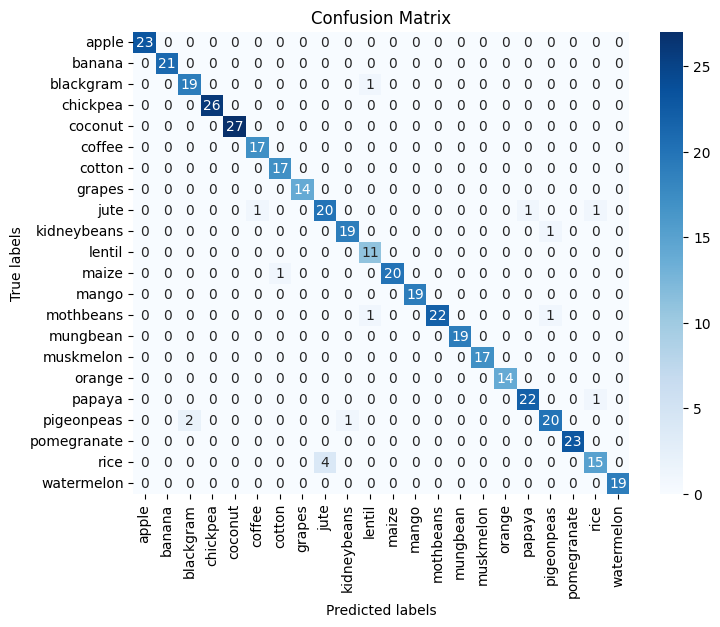

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Support Vector Classifier(SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predict the target variable on the training set
y_train_pred = svm_model.predict(X_train)
print(y_train_pred)

['orange' 'blackgram' 'lentil' ... 'mango' 'grapes' 'lentil']


In [ ]:
# Predict the target variable on the test set
y_test_pred = svm_model.predict(X_test)
print(y_test_pred)

['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil' 'blackgram' 'coconut' 'pomegranate'
 'jute' 'coconut' 'pomegranate' 'apple' 'cotton' 'papaya' 'muskmelon'
 'coffee' 'papaya' 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'orange'
 'pigeonpeas' 'rice' 'pomegranate' 'mothbeans' 'jute' 'lentil' 'jute'
 'blackgram' 'jute' 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango'
 'blackgram' 'maize' 'mungbean' 'maize' 'pigeonpeas' 'coconut' 'muskmelon'
 'maize' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee' 'kidneybeans'
 'cotton' 'apple' 'banana' 'blackgram' 'watermelon' 'coconut' 'lentil'
 'orange' 'papaya' 'blackgram' 'orange' 'rice' 'muskmelon' 'pigeonpeas'
 'muskmelon' 'coconut' 'jute' 'banana' 'blackgram' 'papaya' 'banana'
 'cotton' 'watermelon' 'orange' 'coffee' 'chickpea' 'jute' 'mothbeans'
 'orange' 'mango' 'coffee' 'mothbeans' 'blackgram' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'papaya' 'pigeonpeas' 'mothbeans' 'kidneybeans'
 

In [ ]:
# Calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.990909090909091
Test Accuracy: 0.9795454545454545


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9795454545454545


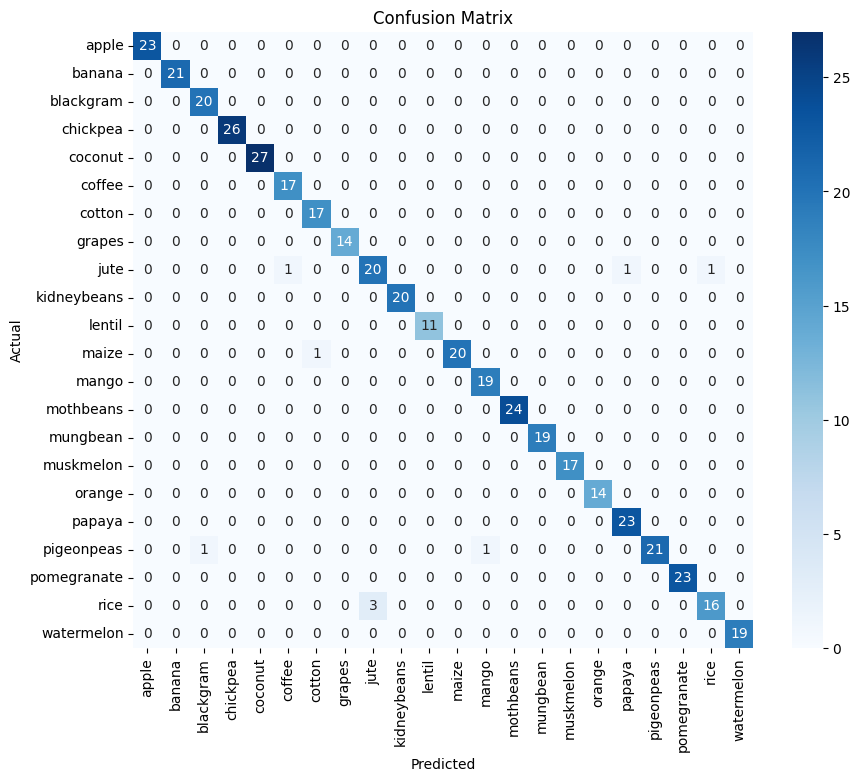

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

In [ ]:
# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the training data
y_train_pred = clf.predict(X_train)
print(y_train_pred)

['orange' 'blackgram' 'lentil' ... 'mango' 'grapes' 'lentil']


In [ ]:
# Make predictions on the testing data
y_test_pred = clf.predict(X_test)
print(y_test_pred)

['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil' 'blackgram' 'coconut' 'pomegranate'
 'jute' 'coconut' 'pomegranate' 'apple' 'maize' 'papaya' 'muskmelon'
 'coffee' 'papaya' 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'orange'
 'pigeonpeas' 'rice' 'pomegranate' 'mothbeans' 'jute' 'lentil' 'jute'
 'blackgram' 'jute' 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango'
 'blackgram' 'maize' 'mungbean' 'maize' 'pigeonpeas' 'coconut' 'muskmelon'
 'maize' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee' 'kidneybeans'
 'cotton' 'apple' 'banana' 'blackgram' 'watermelon' 'coconut' 'lentil'
 'orange' 'papaya' 'pigeonpeas' 'orange' 'rice' 'muskmelon' 'pigeonpeas'
 'muskmelon' 'coconut' 'jute' 'banana' 'blackgram' 'papaya' 'banana'
 'cotton' 'watermelon' 'orange' 'coffee' 'chickpea' 'rice' 'mothbeans'
 'orange' 'mango' 'coffee' 'mothbeans' 'blackgram' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'papaya' 'pigeonpeas' 'mothbeans' 'kidneybeans'
 

In [ ]:
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [ ]:
# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9818181818181818


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9818181818181818


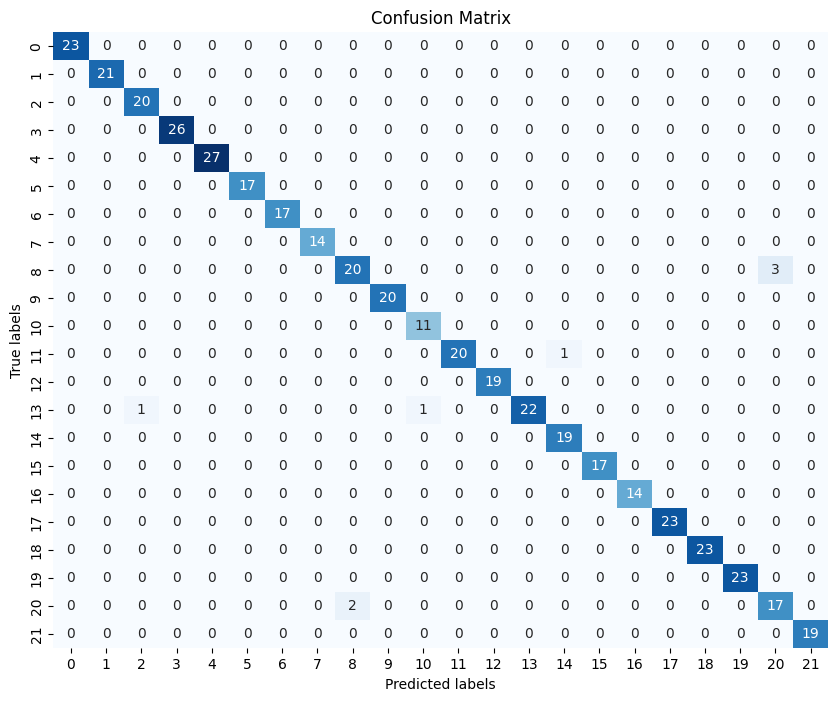

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
   